# LLM Implementation

Architecture Diagram is attached at the end

In [1]:
!pip install transformers sentence-transformers pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
import json

# Load data (change path if using Google Drive)
with open('nust_bank_data (1).json', 'r') as f:
    bank_data = json.load(f)

# Print the first product and its first Q&A pair
first_product = list(bank_data.keys())[0]
print("First Product:", first_product)
print("\nFirst Question:", bank_data[first_product]['details'][0]['question'])
print("\nFirst Answer:", bank_data[first_product]['details'][0]['answer'])

First Product: Little Champs Account

First Question: I would like to open an account with my son, do u have any product for kids?

First Answer: Yes our product is Little Champs Account. It is designed specifically for minors (individuals below the age of 18 years). A child requires the help of a parental/legal guardian to open this account and avail its facilities. Little Champs get a Debit Card and chequebook which is free the first time


In [3]:
import json
import pandas as pd

# Load JSON file
with open('nust_bank_data (1).json', 'r') as f:
    bank_data = json.load(f)

# Convert to a pandas DataFrame
qa_list = []
for product, details in bank_data.items():
    for qa in details['details']:
        qa_list.append({
            'product': product,
            'question': qa['question'],
            'answer': qa['answer']
        })

df = pd.DataFrame(qa_list)
print(f"Total Q&A pairs: {len(df)}")
df.head(3)

Total Q&A pairs: 179


,product,question,answer
0,Little Champs Account,"I would like to open an account with my son, d...",Yes our product is Little Champs Account. It i...
1,Little Champs Account,What other Value added features does the Littl...,"Attractive returns on savings account, SMS ale..."
2,Little Champs Account,What is the account type of Little Champs Acco...,This account is offered both in current and sa...


In [4]:
import re

def clean_text(text):
    text = re.sub(r'\s+', ' ', text).strip()
    text = text.replace(' ,', ',').replace(' .', '.').replace(' ?', '?')
    text = text.lower()
    return text

# Apply cleaning to questions and answers
df['clean_question'] = df['question'].apply(clean_text)
df['clean_answer'] = df['answer'].apply(clean_text)

# Show before/after examples
print("Original Question:", df['question'][0])
print("Cleaned Question:", df['clean_question'][0])

Original Question: I would like to open an account with my son, do u have any product for kids?
Cleaned Question: i would like to open an account with my son, do u have any product for kids?


In [5]:
def advanced_clean(text):
    # Protect special patterns (currency, percentages, dates)
    protected = re.sub(r'(Rs\.|PKR|USD)\s*(\d+)', r'\1\2', text)
    protected = re.sub(r'(\d+)\s*%', r'\1%', protected)

    # General cleaning
    cleaned = re.sub(r'[^\w\s.,%$€£¥₹]', ' ', protected)  # Keep basic punctuation
    cleaned = re.sub(r'\s+', ' ', cleaned).strip()
    return cleaned

df['clean_answer'] = df['answer'].apply(advanced_clean)
print("Protected Example:", df['clean_answer'][1])  # Check for preserved Rs.100/20%

Protected Example: Attractive returns on savings account, SMS alert service on digital transactions, I Net banking services, Free education insurance plan Rs.5,000 per month for 5 years on savings account Rs.10,000 per month for 5 years on current account in case of death of the guardian


In [7]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

def tokenize(text):
    return nltk.word_tokenize(text)

df['tokenized_question'] = df['clean_question'].apply(tokenize)
df['tokenized_answer'] = df['clean_answer'].apply(tokenize)

print("Tokenized Example:", df['tokenized_answer'][0][:10])  # First 10 tokens

Tokenized Example: ['Yes', 'our', 'product', 'is', 'Little', 'Champs', 'Account', '.', 'It', 'is']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [8]:
# Save to CSV
df.to_csv('cleaned_bank_qa.csv', index=False)

# Save to JSON
cleaned_data = df.to_dict('records')
with open('cleaned_bank_qa.json', 'w') as f:
    json.dump(cleaned_data, f)

print("Saved cleaned data!")

Saved cleaned data!


In [9]:
!pip install sentence-transformers pandas numpy

In [10]:
import pandas as pd

# Load the cleaned data (use the file you saved earlier)
df = pd.read_csv('cleaned_bank_qa.csv')  # or pd.read_json('cleaned_bank_qa.json')
print(f"Loaded {len(df)} Q&A pairs")
df.head(2)  # Show first 2 rows

Loaded 179 Q&A pairs


,product,question,answer,clean_question,clean_answer,tokenized_question,tokenized_answer
0,Little Champs Account,"I would like to open an account with my son, d...",Yes our product is Little Champs Account. It i...,"i would like to open an account with my son, d...",Yes our product is Little Champs Account. It i...,"['i', 'would', 'like', 'to', 'open', 'an', 'ac...","['Yes', 'our', 'product', 'is', 'Little', 'Cha..."
1,Little Champs Account,What other Value added features does the Littl...,"Attractive returns on savings account, SMS ale...",what other value added features does the littl...,"Attractive returns on savings account, SMS ale...","['what', 'other', 'value', 'added', 'features'...","['Attractive', 'returns', 'on', 'savings', 'ac..."


In [11]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [12]:
import numpy as np

# Convert questions to embeddings
questions = df['clean_question'].tolist()
question_embeddings = model.encode(questions, show_progress_bar=True)

# Save embeddings (so you don't need to recompute)
np.save('question_embeddings.npy', question_embeddings)
print(f"Embeddings shape: {question_embeddings.shape}")  # Should be (num_questions, 384)

Batches:   0%|          | 0/6 [00:00<?, ?it/s]

Embeddings shape: (179, 384)


In [13]:
from sklearn.metrics.pairwise import cosine_similarity

def find_similar_questions(query, top_k=3):
    # Embed the query
    query_embedding = model.encode([query])

    # Compute similarities
    similarities = cosine_similarity(query_embedding, question_embeddings)[0]

    # Get top-k most similar questions
    top_indices = similarities.argsort()[-top_k:][::-1]

    # Display results
    print(f"Query: '{query}'\nTop {top_k} similar questions:")
    for idx in top_indices:
        print(f"- {df['clean_question'][idx]} (similarity: {similarities[idx]:.2f})")
        print(f"  Product: {df['product'][idx]}\n")

# Test with a sample question
find_similar_questions("How to open a kids account?")

Query: 'How to open a kids account?'
Top 3 similar questions:
- i would like to open an account with my son, do u have any product for kids? (similarity: 0.73)
  Product: Little Champs Account

- who can open a roshan digital account? (similarity: 0.57)
  Product: RDA Digital Customer Onboarding

- i would like to inquire about opening a current account for individuals with your bank. please tell me what options i have? (similarity: 0.56)
  Product: Value Plus Current Account (Individual) (VPCA)



In [14]:
# Save the DataFrame with embeddings
df.to_pickle('bank_qa_with_embeddings.pkl')

In [15]:
!pip install transformers torch sentence-transformers

In [16]:
import torch
from transformers import pipeline

# Load T5 for question-answering
qa_model = pipeline(
    "text2text-generation",
    model="google-t5/t5-small",
    device=0 if torch.cuda.is_available() else -1  # Use GPU if available
)

print("Model loaded!")

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cuda:0


Model loaded!


In [27]:
def generate_answer(user_query):
    # Find most relevant question (using embeddings)
    query_embedding = model.encode([user_query])
    similarities = cosine_similarity(query_embedding, question_embeddings)[0]
    best_idx = similarities.argmax()

    # Get the corresponding official answer as context
    context = df.iloc[best_idx]['clean_answer']

    # Rephrase it conversationally for the LLM
    prompt = f"""
    You are a helpful bank customer service assistant.
    Based on this context: '{context}'
    Answer this question: '{user_query}'
    """

    generated_answer = qa_model(
        prompt,
        max_length=200,
        temperature=0.7
    )[0]['generated_text']

    return generated_answer

In [18]:
# Example 1
print(generate_answer("How do I open a kids account?"))

# Example 2
print(generate_answer("What's the interest rate for savings accounts?"))

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


A child requires the help of a parental legal guardian to open this account and avail its facilities


/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


'Current profit rate is 20.50% which is paid Semi Annually


In [80]:
print(generate_answer("What documents are needed to open a kids account?"))

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Form B, Birth Certificate or Student ID card as appropriate of the minor


In [84]:
def improved_answer(user_query, similarity_threshold=0.65):
    # Check similarity first
    query_embedding = model.encode([user_query])
    #best_sim = cosine_similarity(query_embedding, question_embeddings)[0].max()

    similarities = cosine_similarity(query_embedding, question_embeddings)[0]
    best_idx = similarities.argmax()
    best_score = similarities[best_idx]

    if best_score < similarity_threshold:
        return "I couldn't find specific information about that. Could you rephrase or ask about another banking topic?"
    else:
        return generate_answer(user_query)

# Test with off-topic question
print(improved_answer("How to cook pasta?"))

I couldn't find specific information about that. Could you rephrase or ask about another banking topic?


In [85]:
print(improved_answer("What documents are required for NAA?"))

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


'Resident Pakistani individuals who do not maintain have any other account single or joint in NUST Bank Limited are eligible to open the NAA in Pak rupees as a single joint account


# Architecture Diagram:

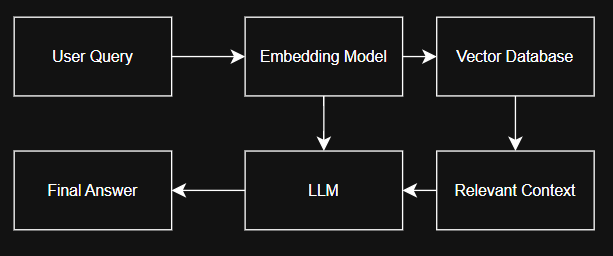

# Frontend

In [59]:
!pip install gradio

In [61]:
import gradio as gr

In [88]:
def gradio_wrapper(message, history = None):
    return improved_answer(message)

# Launch the chat UI
demo = gr.ChatInterface(
    fn=gradio_wrapper,
    title="Bank Customer Support Bot",
    description="Ask me about accounts, loans, or policies!",
    examples=["What is the Eligibility Criteria for NAA?", "What documents are required to open a Little Champs Account?"],
    theme="soft",
)

demo.launch(share=True)  # Creates a public link

/usr/local/lib/python3.11/dist-packages/gradio/chat_interface.py:339: UserWarning: The 'tuples' format for chatbot messages is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style 'role' and 'content' keys.
  self.chatbot = Chatbot(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://bc5f6fbe6c2aa6ff4d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
